# Note: As the VM's running this code are being recycled, we need to run the install statements if we start this notebook.

#Installing PyDrive

This module is used to connect with google drive 
from where we will load the images.zip file into the VM running this notebook.

In [1]:
# Code to check the resources available Ex. GPU RAM
'''
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm()
'''


  Running setup.py bdist_wheel for gputil ... - done
  Stored in directory: /content/.cache/pip/wheels/17/0f/04/b79c006972335e35472c0b835ed52bfc0815258d409f560108
Successfully built gputil
  Running setup.py bdist_wheel for humanize ... - done
  Stored in directory: /content/.cache/pip/wheels/69/86/6c/f8b8593bc273ec4b0c653d3827f7482bb2001a2781a73b7f44
Successfully built humanize
Gen RAM Free: 12.7 GB  | Proc size: 138.8 MB
GPU RAM Free: 11439MB | Used: 0MB | Util   0% | Total 11439MB


In [2]:
# Installing PyDrive
!pip install PyDrive

    100% |████████████████████████████████| 993kB 9.9MB/s 
  Running setup.py bdist_wheel for PyDrive ... - \ done
  Stored in directory: /content/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:

# Insert zip folder with all training images in it. Then unzip it
fileId = drive.CreateFile({'id': '1hskycOJ4UC8UGMrynpbyL6wyCs5IZvje'}) # id is the id of the file being uploaded
print (fileId['title'])  # imgaes.zip
file = fileId['title']
fileId.GetContentFile(file)  # Save Drive file as a local file


images.zip


In [5]:
# Unzip the datafile
!unzip images.zip -d ./


  inflating: ./images/train/unannotated/1215.jpg  
  inflating: ./images/train/unannotated/1216.jpg  
  inflating: ./images/train/unannotated/1217.jpg  
  inflating: ./images/train/unannotated/1218.jpg  
  inflating: ./images/train/unannotated/1219.jpg  
  inflating: ./images/train/unannotated/1220.jpg  
  inflating: ./images/train/unannotated/1221.jpg  
  inflating: ./images/train/unannotated/1222.jpg  
  inflating: ./images/train/unannotated/1223.jpg  
  inflating: ./images/train/unannotated/1224.jpg  
  inflating: ./images/train/unannotated/1225.jpg  
  inflating: ./images/train/unannotated/1226.jpg  
  inflating: ./images/train/unannotated/1227.jpg  
  inflating: ./images/train/unannotated/1228.jpg  
  inflating: ./images/train/unannotated/1229.jpg  
  inflating: ./images/train/unannotated/1230.jpg  
  inflating: ./images/train/unannotated/1231.jpg  
  inflating: ./images/train/unannotated/1232.jpg  
  inflating: ./images/train/unannotated/1233.jpg  
  inflating: ./images/train/un

In [6]:
!ls
!rm images.zip
!ls

datalab  images  images.zip
datalab  images


# Installing PyTorch  & OpenCV

In [7]:
# Install pytorch
# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision

tcmalloc: large alloc 1073750016 bytes == 0x5b36a000 @  0x7f4f764ce1c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8


In [8]:
#Check install and version
import torch
torch.__version__


'0.4.0'

In [9]:
if torch.cuda.is_available():
   print("Yay!!")
    

Yay!!


In [10]:
# Install openCV
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

# Installing Pillow as py torch transform dependencies
!pip install Pillow==4.1.1
!pip install image



    100% |████████████████████████████████| 5.7MB 6.8MB/s 
  Found existing installation: Pillow 5.2.0
    Uninstalling Pillow-5.2.0:
      Successfully uninstalled Pillow-5.2.0
    100% |████████████████████████████████| 7.3MB 4.0MB/s 


In [0]:
import cv2

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from torch.autograd import Variable

In [0]:
# Initialize paths for train and test directory

# First need to give path to dataset which is the images folder
# Set train andvalidation directory path
train_dir = 'images/train'
val_dir = 'images/val'

# Load the data

# Normalizing the images
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                 std=[0.229, 0.224, 0.225])

transform = transforms.Compose([transforms.Resize((1200,600)),
                                transforms.ToTensor(),
                                normalize])

training_folder = datasets.ImageFolder(train_dir,
                                       transform = transform)

# Trainig Data
# no of images in training folder must be 
# divisible by 4 or batch normalization wont work
train_loader = data.DataLoader(
    training_folder,
    batch_size = 4, 
    shuffle = True,
    num_workers = 0,
    pin_memory = True)


validation_folder = datasets.ImageFolder(val_dir,
                                         transform = transform)

# Validation Data
val_loader = data.DataLoader(
    validation_folder,
    batch_size = 4,
    shuffle = True,
    num_workers = 0,
    pin_memory = True)


In [3]:
# Check length. Make sure data was properly loaded
dataset_sizes = { 'train': len(train_loader), 'test': len(val_loader) }
class_names = training_folder.classes
print(dataset_sizes)
print(class_names)

{'train': 743, 'test': 107}
['annotated', 'unannotated']


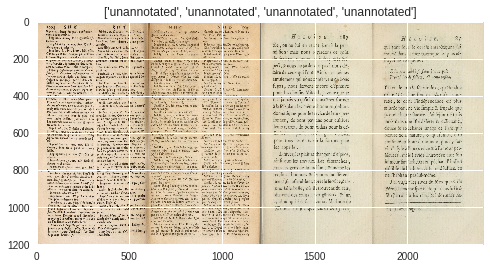

In [13]:
# Vizualizing some training data
'''
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


    
# Get a batch of training data
inputs, classes = next(iter(train_loader))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

# Getting class lables
class_names = training_folder .classes

imshow(out, title=[class_names[x] for x in classes])
'''

In [0]:
# Creating the Convolutional Neural Network

class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__() # Calling constructor of nn.Module
    
    # Convolution Layers
    # Reduce kernel/filter size with layers, start with 5x5 then reduce to 3x3
    # groups = 3 as imputs are three channel images
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=36, 
                           kernel_size=5, groups=3)
    self.bn1 = nn.BatchNorm2d(36)
    
    self.conv2 = nn.Conv2d(in_channels=36, out_channels=36, 
                           kernel_size=3, groups=3)
    self.bn2 = nn.BatchNorm2d(36)
    
    self.conv3 = nn.Conv2d(in_channels=36, out_channels=36, 
                           kernel_size=3, groups=3)
    self.bn3 = nn.BatchNorm2d(36)
    
    # As we need to detect more features as we go deeper, 
    # we increase the out_channels, and reduce kernel_size for finer features 
    self.conv4 = nn.Conv2d(in_channels=36, out_channels=64, kernel_size=2)
    self.bn4 = nn.BatchNorm2d(64)
    
    # Fully Connected Layer
    # No. of in_features = 381024 
    # obtained by calling forward once. Expected input apprears in error msg
    self.fc1 = nn.Linear(in_features=381024, out_features=128)
    self.fcbn1 = nn.BatchNorm1d(128)
    
    # Hidden Layers
    self.fc2 = nn.Linear(in_features=128, out_features=128)
    self.fcbn2 = nn.BatchNorm1d(128)
    
    # Output Layer
    self.fc3 = nn.Linear(in_features=128, out_features=2)
    
    
  def forward(self,x):
    
    x= self.bn1(self.conv1(x))
    x= F.max_pool2d(x,kernel_size=3,stride=2)
    x= F.relu(x)
    
    x= self.bn2(self.conv2(x))
    x= F.max_pool2d(x,kernel_size=3,stride=2)
    x= F.relu(x)
    
    x= self.bn3(self.conv3(x))
    x= F.max_pool2d(x,kernel_size=3,stride=2)
    x= F.relu(x)
    
    # Flattening 
    x = x.view(x.size(0),-1)
    
    # Fully connected layers
    x = self.fcbn1(self.fc1(x))
    x = self.fcbn2(self.fc2(x))
    x = self.fc3(x)
    
    # Returning log Softmax of the binary outputs
    return F.log_softmax(x, dim=1)
  
  
  

    

In [6]:
# Setting the device that will be used for training.
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

# Creating the model instance. 
model = CNN().to(device)

cuda:0


In [0]:
# Loss Function and optimizer
criterion = nn.CrossEntropyLoss() # Loss Function
# We are using Stochastic Gradient descent as our optimizer
optimizer = optim.SGD(model.parameters(), lr = 0.01, momentum=0.5)

In [0]:
# Training the model

def train(epochs):
  model.train()
  
  for epoch in range(epochs):
    
    
    # As dataloader has batch_size = 4
    # We will get one batch of 4 images with each iteration 
    for i, (images_batch, target) in enumerate(train_loader):

      # Convert images_batch and target to pytorch Variable
      images_batch, target = Variable(images_batch),Variable(target)

      optimizer.zero_grad() # Make sure gradients are initially 0
      
      # Converting input to type torch.cuda
      images_batch.requires_grad_()
      images_batch = images_batch.to(device)
      
      # Converting targets to type torch.cuda
      target.requires_grad_()
      target = target.to(device)
      
      out = model(images_batch) # Forward pass

      loss = criterion(out, target) # Computing the loss
      loss.backward() # Back-Prop the loss / Backward Pass

      optimizer.step() # Update the gradients
      
      print(f'Batch : {i+1} Loss : {loss}')

    print(f'Epoch : {epoch+1} Loss : {loss}')


In [0]:
train(1)

In [0]:
# Saving the model
torch.save(model.state_dict(), 'model_data.pt')

In [8]:
!ls -l


total 190676
drwxr-xr-x 1 root root      4096 Aug  9 16:33 datalab
drwxrwxr-x 4 root root      4096 Aug  3 14:18 images
-rw-r--r-- 1 root root 195236047 Aug  9 16:36 model_data.pt


In [42]:
# Not working as of now. Saving file of 0 bytes
'''# Code to upload the saved model to google drive
uploaded = drive.CreateFile({'title': 'model_data1.pt'})
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))
'''

Uploaded file with ID 1ImaHrzdBdz--b8NwVMGpBbIuBBbVM0tq


In [0]:
# Saves trained model to local disk, 
# can later be uploaded to drive and work with it
from google.colab import files
files.download('model_data.pt')

In [0]:
# Fetching the model_data file from google drive
fileId = drive.CreateFile({'id': '1J8ih-neNHpuSGaWfpH5EBQJYxN83j4NO'}) # id of model_data file
file = fileId['title']
fileId.GetContentFile(file)  # Save Drive file as a local file


In [0]:
# Creating a model and Loading the state data saved earlier
model = CNN().to(device)
model.load_state_dict(torch.load('model_data.pt'))

In [0]:
# Validating the model

def validate(epochs):
  model.eval()
  loss = 0
  correct = 0
  
  for epoch in range(epochs):
    
    
    # As dataloader has batch_size = 4
    # We will get one batch of 4 images with each iteration 
    for i, (images_batch, target) in enumerate(val_loader):

      # Convert images_batch and target to pytorch Variable
      images_batch, target = Variable(images_batch),Variable(target)

      # setting this context handler ensures that the loss is not
      # backpropagated and we don't run out of GPU memory.
      # Note: if we still run out of GPU memory then decrease batch size
      # in the dataLoader (val_loder in this case)
      
      with  torch.no_grad():
        # Converting input to type torch.cuda
        images_batch.requires_grad_()
        images_batch = images_batch.to(device)

        # Converting targets to type torch.cuda
        target.requires_grad_()
        target = target.to(device)

        out = model(images_batch) # Forward pass

        loss += criterion(out, target) # Computing the loss and summing over it

        print(f'Batch : {i+1} Aggregate batch loss : {loss}')
        
        pred = out.data.max(1, keepdim=True)[1]
        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    loss /= len(val_loader.dataset)
        
    print('\nAverage loss: {:.4f}, Accuracy: {}/{} ({:.3f}%)\n'.format(
        loss, correct, len(val_loader.dataset),
        100. * correct / len(val_loader.dataset)))
    
    
    
    
    print(f'Epoch : {epoch+1} avg loss : {loss}')



In [0]:
# Need to reduce batch_size. With batch_size = 4, GPU runs out of memory 
validate(1)

In [70]:
# Code to upload sample images for teting
def upload_files():
  from google.colab import files
  uploaded = files.upload()
  for k, v in uploaded.items():
    open(k, 'wb').write(v)
  return list(uploaded.keys())

upload_files()


Saving img1.jpg to img1.jpg


['img1.jpg']

In [84]:
# Testing the model 

from PIL import Image

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                                 std=[0.229, 0.224, 0.225])

loader = transforms.Compose([transforms.Resize((1200,600)),
                                transforms.ToTensor(),
                                normalize])

def image_loader(image_name):
    """load image, returns cuda tensor"""
    image = Image.open(image_name)
    image = loader(image).float()
    image = Variable(image, requires_grad=True)
    # adding a batch dimension to the input image
    image = image.unsqueeze(0) 
    return image.to(device)  #assumes that you're using GPU
    

image = image_loader('img1.jpg')

out = model(image)

# Model output.data:
# tensor([[-0.4743, -0.9738]], device='cuda:0')
#print(out.data[0])
# As log_softmax gives output between [-inf,1] 
#we need to extract the class probabilities

out = torch.exp(out)[0]

# Extracting output data -> converting from cuda() to cpu() -> then into numpy 
out = out.data.cpu().numpy()
out = list(out) # Converting to list

# Get the class names from the training folder ['annotated', 'unannotated']
class_names = training_folder.classes

i = out.index(max(out))
# as i in format [index_value]
test_image_label = class_names[i]


print(test_image_label)

unannotated
